In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

**Setting**
create specific Single Item Auction setting with Return-on-Invest

In [41]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [0.0, 1.0]}
a_space = {'1': [0.0, 1.0]}
param_prior = {
    'distribution':'uniform',
    }
param_util = {
    'payment_rule': 'first_price', 
    'tie_breaking': 'lose', 
    'utility_type': 'ROI'
    }
# parameter approximation game
n = 64
m = 64

config = Config()
config.create_config_game("single_item", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    game.get_utility()
game.get_utility()

- gradient computation via mechanism -


**Learner**
Specify Learning Algorithm

In [32]:
# parameter learner
max_iter = int(5e3)
tol = 1e-5
stop_criterion = 'util_loss'
param_learner = {
    "mirror_map": "euclidean",
    "steprule_bool": True,
    "eta": 10,
    "beta": 0.5,
}

config.create_config_learner("soma", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [37]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 5.00k/5.00k [00:02<00:00, 1.72kit/s]

No convergence with stopping criterion
Current value of (util_loss): 0.77160
Best value of (util_loss)   : 0.42505)


Visualization of the learning process and the final result

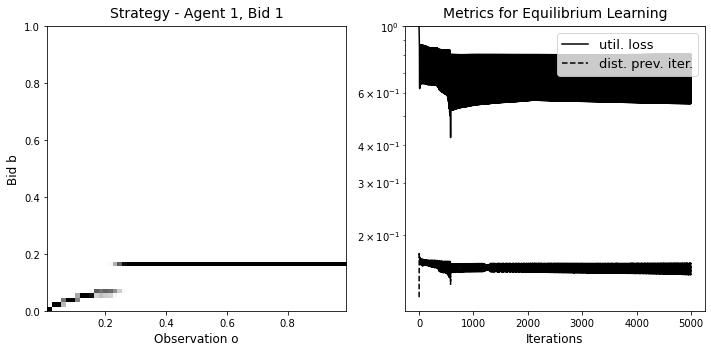

In [38]:
strategies['1'].plot(metrics=True)

In [6]:
gradient1 = learner.gradient.x['1']

In [7]:
from src.learner.gradient import Gradient
import numpy as np

In [8]:
grad = Gradient()
grad.prepare(game, strategies)
grad.compute(game, strategies, '1')

In [9]:
gradient2 = grad.x['1']

In [10]:
np.allclose(gradient1, gradient2)

False

In [14]:
import matplotlib.pyplot as plt

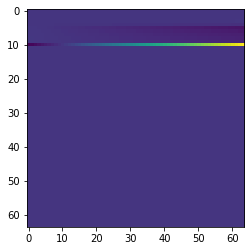

In [35]:
plt.imshow((gradient1-gradient2).T)

In [36]:
gradient1[:,10]

array([-0.95078125, -0.85234375, -0.75390625, -0.65546875, -0.55703125,
       -0.45859375, -0.36015625, -0.26171875, -0.16328125, -0.06484375,
        0.03359375,  0.13203125,  0.23046875,  0.32890625,  0.42734375,
        0.52578125,  0.62421875,  0.72265625,  0.82109375,  0.91953125,
        1.01796875,  1.11640625,  1.21484375,  1.31328125,  1.41171875,
        1.51015625,  1.60859375,  1.70703125,  1.80546875,  1.90390625,
        2.00234375,  2.10078125,  2.19921875,  2.29765625,  2.39609375,
        2.49453125,  2.59296875,  2.69140625,  2.78984375,  2.88828125,
        2.98671875,  3.08515625,  3.18359375,  3.28203125,  3.38046875,
        3.47890625,  3.57734375,  3.67578125,  3.77421875,  3.87265625,
        3.97109375,  4.06953125,  4.16796875,  4.26640625,  4.36484375,
        4.46328125,  4.56171875,  4.66015625,  4.75859375,  4.85703125,
        4.95546875,  5.05390625,  5.15234375,  5.25078125])

In [26]:
gradient2[:,10]

array([-0.2209228 , -0.19804994, -0.17517708, -0.15230422, -0.12943136,
       -0.10655849, -0.08368563, -0.06081277, -0.03793991, -0.01506704,
        0.00780582,  0.03067868,  0.05355154,  0.0764244 ,  0.09929727,
        0.12217013,  0.14504299,  0.16791585,  0.19078872,  0.21366158,
        0.23653444,  0.2594073 ,  0.28228016,  0.30515303,  0.32802589,
        0.35089875,  0.37377161,  0.39664448,  0.41951734,  0.4423902 ,
        0.46526306,  0.48813593,  0.51100879,  0.53388165,  0.55675451,
        0.57962737,  0.60250024,  0.6253731 ,  0.64824596,  0.67111882,
        0.69399169,  0.71686455,  0.73973741,  0.76261027,  0.78548313,
        0.808356  ,  0.83122886,  0.85410172,  0.87697458,  0.89984745,
        0.92272031,  0.94559317,  0.96846603,  0.99133889,  1.01421176,
        1.03708462,  1.05995748,  1.08283034,  1.10570321,  1.12857607,
        1.15144893,  1.17432179,  1.19719465,  1.22006752])